In [10]:
import pandas as pd  
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
train_df = pd.read_csv(r"C:\Users\USER\Datasets\Language Detection\train.csv")
test_df = pd.read_csv(r"C:\USERS\USER\Datasets\Language Detection\test (3).csv")

In [3]:
train_df.head(5)

,id,code,language
0,14026,var result = testObj1 | testObj2;\...,c-sharp
1,12201,/// Initializes a new instance of ...,c-sharp
2,17074,/*\n\n Explanation :- a user gives a Strin...,javascript
3,21102,int sum = 0;\n\n for (int i = ...,c-plus-plus
4,53065,if (p->data < min)\n\n {\n\n ...,c


In [7]:
train_df['language'].unique()

array(['c-sharp', 'javascript', 'c-plus-plus', 'c', 'python', 'ruby',
       'swift', 'java', 'go', 'dart', 'julia', 'f-sharp', 'php', 'R',
       'scala'], dtype=object)

In [22]:
from collections import Counter
labels = Counter(train_df.language)
labels

Counter({'c-sharp': 3890,
         'javascript': 2701,
         'c-plus-plus': 11277,
         'c': 4565,
         'python': 12678,
         'ruby': 1117,
         'swift': 260,
         'java': 4318,
         'go': 1981,
         'dart': 1023,
         'julia': 1005,
         'f-sharp': 246,
         'php': 260,
         'R': 160,
         'scala': 147})

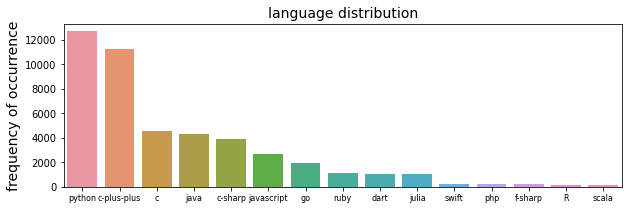

In [23]:
labels,label_count = zip(*labels.most_common())
plt.figure(figsize=(10,3))
ax = sns.barplot(x=list(labels),y=list(label_count))
ax.set_xticklabels(labels,rotation=0,fontsize=8)
plt.title("language distribution",fontsize=14)
plt.ylabel("frequency of occurrence",fontsize=14)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoding = LabelEncoder().fit(train_df.language)
train_df['target'] = label_encoding.transform(train_df.language)

In [39]:
x_train,y_train = train_df['code'],train_df['target']

In [40]:
x_test,y_test = test_df['code'],test_df['target']

0                    var result = testObj1 | testObj2;\...
1                ///     Initializes a new instance of ...
2        /*\n\n     Explanation :- a user gives a Strin...
3                int sum = 0;\n\n         for (int i = ...
4                if (p->data < min)\n\n         {\n\n  ...
                               ...                        
45623            check = 3\n\n     x = len(coordinates)...
45624                self.fib_array.append(0)\n\n      ...
45625        do {\n\n         std::cout << "\n1. Insert...
45626    package Sorts;\n\n import java.util.Arrays;\n\...
45627            calculateInDegree();\n\n         Queue...
Name: code, Length: 45628, dtype: object

In [44]:
#creating a validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=12)

In [47]:
x_train.shape,x_val.shape,

((36502,), (9126,))

# Creating a baseline model 

In [48]:
vectorizer = CountVectorizer(ngram_range=(1, 5))

In [50]:
vectors = vectorizer.fit(x_train)

In [52]:
x_train_vectorised = vectors.transform(x_train)

In [55]:
x_test_vectorised = vectors.transform(x_val)

In [57]:
tfidf_transformer = TfidfTransformer()

In [ ]:
document = [Huge amount of data around 7MB] # ['john is a guy', 'person guy']
vectorizer = CountVectorizer(ngram_range=(1, 5))

# Don't need both X and transformer; they should be identical
X = vectorizer.fit_transform(document)
matrix_terms = np.array(vectorizer.get_feature_names())

# Use the axis keyword to sum over rows
matrix_freq = np.asarray(X.sum(axis=0)).ravel()
final_matrix = np.array([matrix_terms,matrix_freq])

In [60]:
classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
classifier = classifier.fit(x_train, y_train)

In [61]:
classifier

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [64]:
print("f1 score: ",f1_score(y_val,classifier.predict(x_val),average='macro'))
print("accuracy : ",accuracy_score(y_val,classifier.predict(x_val))*100)

f1 score:  0.33830945646743504
accuracy :  66.07495069033531


## Deep Learning 

In [65]:
from transformers import BERTModel,BertTokenizer 

ImportError: cannot import name 'BERTModel' from 'transformers' (C:\Users\USER\.conda\envs\deeplearn\lib\site-packages\transformers\__init__.py)